# Preparation

Get best known solution sample test data stored in csv format:

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from extractors import *

sns.set(style="ticks")

df = pd.read_csv('../experiments/demo/out/best_known_solutions.csv')

# Cost variation vs Config

This visualization shows how different configuration influences solution's total cost:

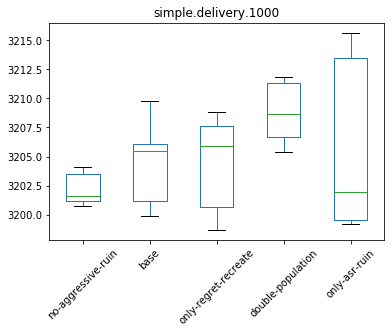

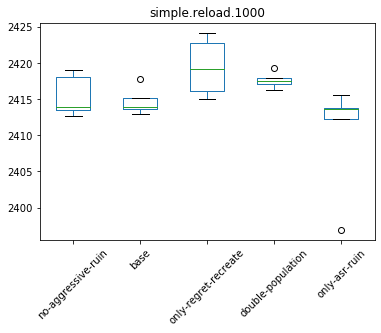

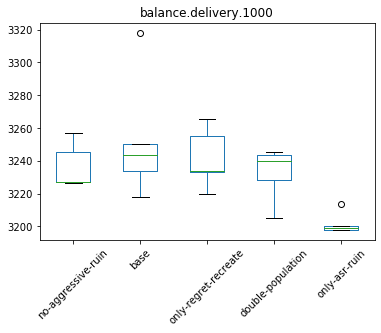

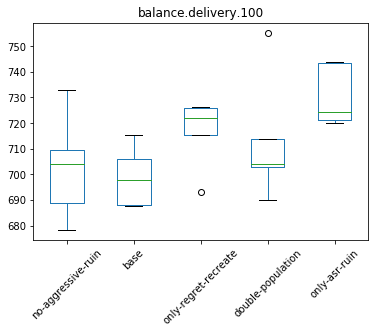

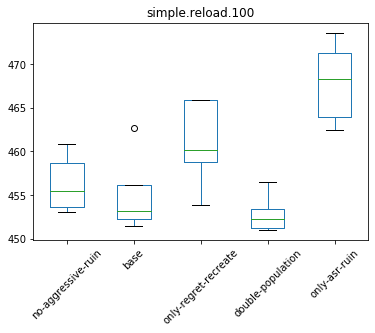

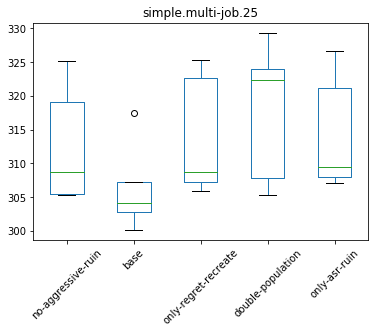

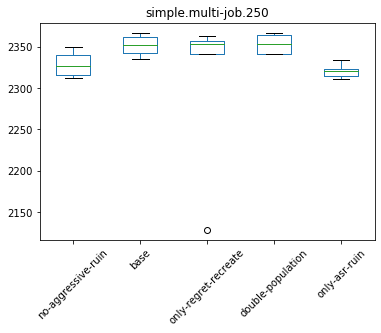

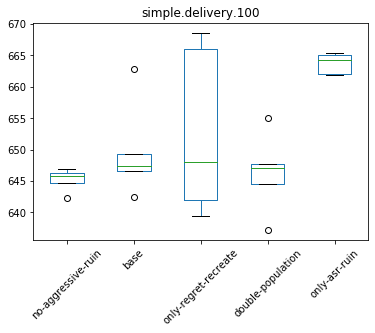

In [28]:
for problem in get_problems(df):
    columns = []
    for config in get_configs(df):
        columns.append(extract_columns(df, config_name = config, problem_name = problem, 
                                      target_columns = ['Cost'], new_labels=[config]))
    pd.concat(columns, axis = 1).plot(kind = 'box', title = problem, rot = 45)

# Cost vs Time

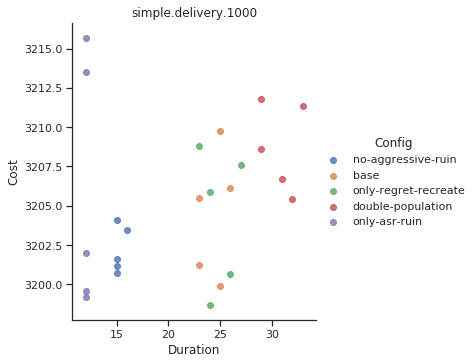

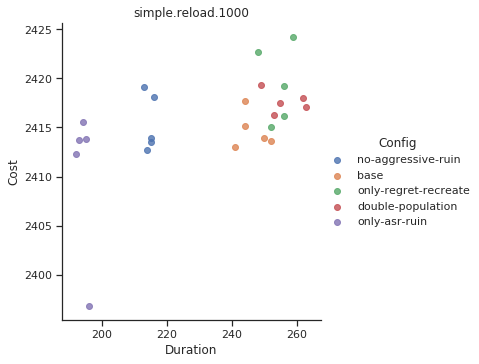

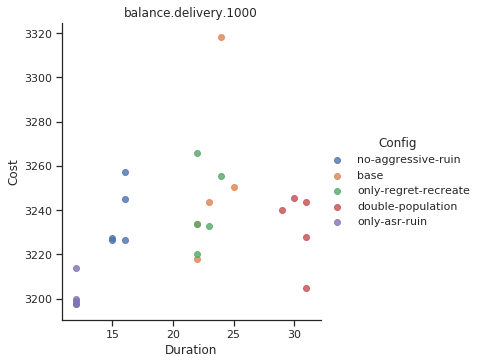

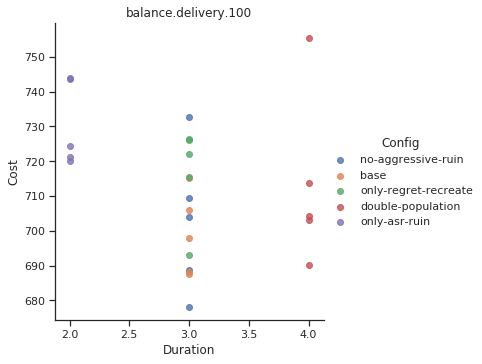

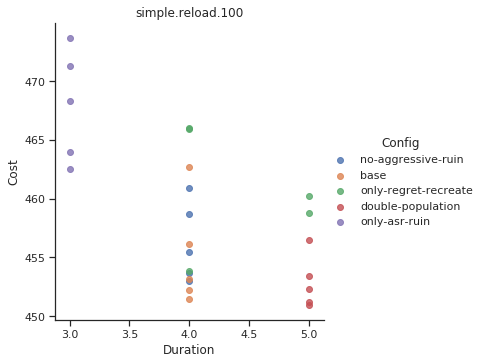

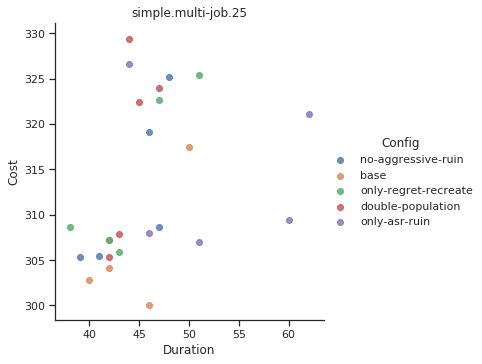

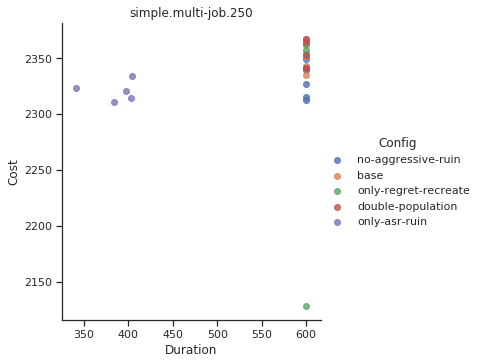

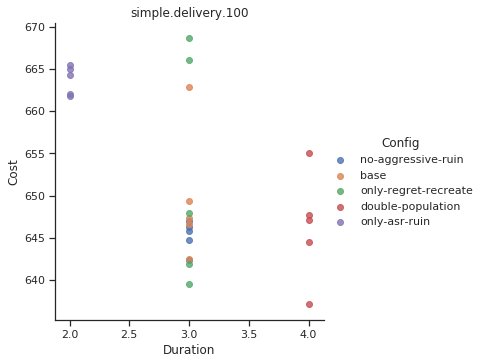

In [40]:
for problem in get_problems(df):
    columns = []
    configs = get_configs(df)
    for config in configs:
        column = extract_columns(df, config_name = config, problem_name = problem, 
                                 target_columns = ['Cost', 'Duration'], new_labels = ['Cost', 'Duration'])
        column['Config'] = config
        columns.append(column)   
    
    sns.lmplot(x='Duration', y='Cost', data=pd.concat(columns, axis = 0),
               fit_reg=False, hue='Config')
    plt.title(problem)

# Cost vs Generations

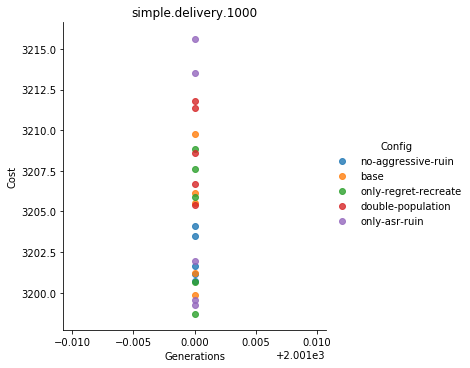

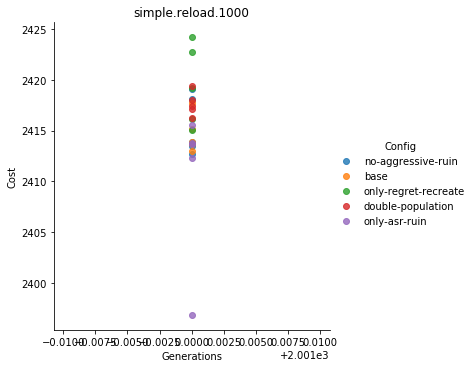

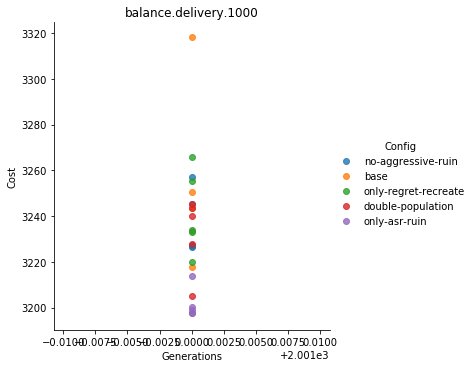

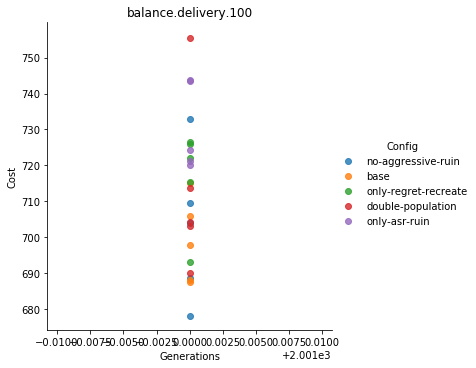

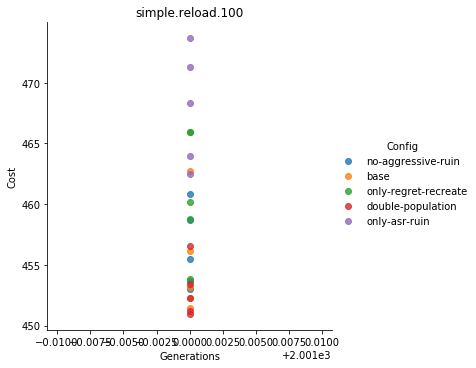

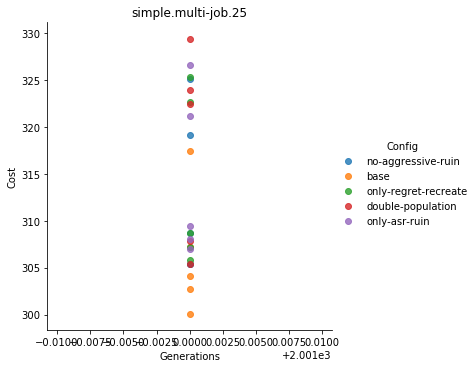

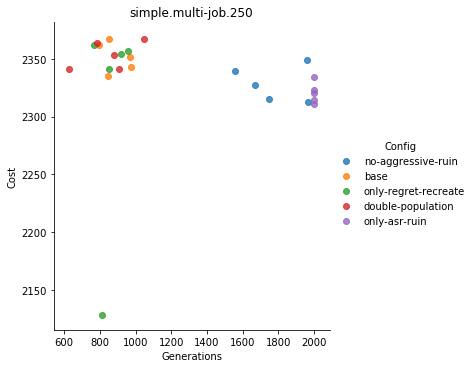

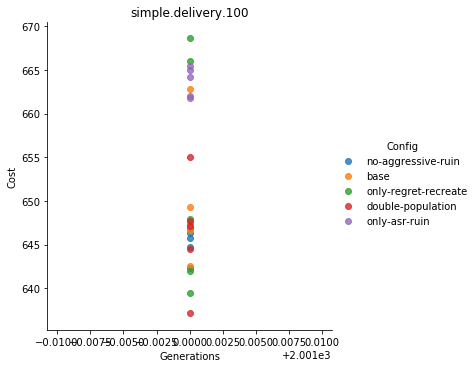

In [38]:
for problem in get_problems(df):
    columns = []
    configs = get_configs(df)
    for config in configs:
        column = extract_columns(df, config_name = config, problem_name = problem, 
                                 target_columns = ['Cost', 'Generations'], new_labels = ['Cost', 'Generations'])
        column['Config'] = config
        columns.append(column)   
    
    sns.lmplot(x='Generations', y='Cost', data=pd.concat(columns, axis = 0),
               fit_reg=False, hue='Config')
    plt.title(problem)